**간단한 컨브넷 만들기**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
inputs = tf.keras.Input(shape=(28, 28, 1)) # (28, 28, 1) 형태의 3차원 텐서를 입력
#  32개의 3x3 크기의 필터를 사용하는 합성곱 레이어를 정의하고, 입력 이미지에 적용
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 텐서를 1차원으로 평탄화해서 모든 픽셀 값들을 연속적인 벡터 형태로 변환
# 출력 레이어로 완전 연결 레이어로, 10개의 뉴런을 가지며 각 뉴런은 이미지가 특정 클래스에 속할 확률을 출력
outputs = layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

**모델의 `summary()` 메서드 출력**

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

**MNIST 이미지에서 컨브넷 훈련하기**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8801 - loss: 0.3755
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9851 - loss: 0.0477
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9908 - loss: 0.0301
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss: 0.0161


**컨브넷 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0310
테스트 정확도: 0.992


### 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### Kaggle 데이터 내려받기
1. 캐글 API Token 발급
- 캐글 사이트 account 페이지 이동 > API 섹션 내 CREATE NEW API TOKEN 클릭 > 다운로드된 파일 kaggle.json 확인

https://www.kaggle.com/settings

In [1]:
# colab에서 kaggle 설치
!pip install kaggle

In [2]:
# 이후에 google colab이 제공하는 file을 통해 kaggle json 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amicokb330gmailcom","key":"568a3d0cab2590d7d7cb91d04e0a7099"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  kaggle.json  sample_data


권한을 세 자리로 나타내는 방식:
- 첫 번째 숫자 (6): **파일 소유자(owner)**에 대한 권한을 나타냅니다.
- 두 번째 숫자 (0): **그룹(group)**에 대한 권한을 나타냅니다.
- 세 번째 숫자 (0): **기타 사용자(others)**에 대한 권한을 나타냅니다.

각 숫자는 다음과 같이 구성됩니다:
- 4: 읽기 권한 (read)
- 2: 쓰기 권한 (write)
- 1: 실행 권한 (execute)
- 0: 아무 권한 없음

In [5]:
# .kaggle 디렉토리 생성
!mkdir -p ~/.kaggle

# json 파일 .kaggle 디렉토리로 이동
!cp kaggle.json ~/.kaggle/

# 권한 변경
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# 사용자의 홈 디렉토리(~) 내의 파일과 디렉토리 목록을 자세한 정보와 함께 나열
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Sep 10 00:30 .
drwx------ 1 root root 4096 Sep 10 00:30 ..
-rw------- 1 root root   74 Sep 10 00:30 kaggle.json


In [ ]:
# Kaggle CLI 도구는 Kaggle의 API를 사용하여 데이터셋을 다운로드하고, Kaggle 대회에 참가하며, 데이터셋을 업로드하는 등 다양한 기능을 제공
!pip install --upgrade kaggle

In [7]:
!kaggle --version

Kaggle API 1.6.17


In [8]:
!pip show kaggle

Name: kaggle
Version: 1.6.17
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats?rvi=1

Copy Api command > kaggle datasets download -d biaiscience/dogs-vs-cats

In [9]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 97% 796M/817M [00:03<00:00, 260MB/s]
100% 817M/817M [00:03<00:00, 275MB/s]


In [10]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [11]:
!unzip -qq dogs-vs-cats.zip # qq' 옵션은 'quiet' 모드로 unzip 명령어가 해제 과정의 세부 정보를 출력하지 않습니다.
# !unzip -qq train.zip

In [12]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [13]:
#  mv는 파일이나 디렉토리를이동(move)하거나 이름을 변경(rename)할 때 사용
!mv train train1
!mv test test1

In [14]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test1  train1


In [15]:
!mv /content/train1/train /content/
!mv /content/test1/test /content/

In [16]:
!rm -rf test1 train1

In [17]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [ ]:
!ls train/

**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

코드를 실행하면, 'cats_vs_dogs_small' 디렉토리 아래에 'cat'과 'dog' 각각의 이미지가 포함된 'train', 'validation', 'test' 세 개의 서브 디렉토리가 생성됩니다. 이렇게 하면 원본 이미지 데이터셋의 일부를 추출하여 새로운, 더 작은 데이터셋을 만드는 데 유용

In [19]:
# 원본 이미지 데이터셋에서 일부 데이터를 추출하여 새로운 하위 데이터셋을 생성.
# 이 하위 데이터셋은 훈련, 검증, 테스트의 세 가지 부분으로 구성
import os, shutil, pathlib

# pathlib의 주요 기능으로는 경로 조작, 파일 시스템 정보 조회, 파일/디렉토리 생성 및 삭제 등이 있습니다.
original_dir = pathlib.Path("train") # 'train' 폴더를 원본 데이터셋의 디렉토리로 설정
new_base_dir = pathlib.Path("cats_vs_dogs_small") # 'cats_vs_dogs_small' 폴더를 새로운 데이터셋의 베이스 디렉토리로 설정

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"): # 각 카테고리에 대해 작업을 수행
        dir = new_base_dir / subset_name / category # 각 카테고리의 새로운 디렉토리 경로를 생성
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, # shutil.copyfile을 사용하여 원본 디렉토리에서 새 디렉토리로 이미지 파일을 복사
                            dst=dir / fname) # 원본 디렉토리에서 해당 파일을 복사하여 새 디렉토리에 붙여넣기

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [20]:
!ls cats_vs_dogs_small/

test  train  validation


### 모델 만들기

**강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기**

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(180, 180, 3)) # 높이와 너비가 각각 180 픽셀이며 3개의 채널(RGB)을 가진 이미지 입력
x = layers.Rescaling(1./255)(inputs) # 입력 이미지의 픽셀 값을 [0, 1] 범위로 재조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) # 32개의 필터를 사용하며, 각 필터의 크기는 3x3
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**모델 훈련 설정하기**

RMSprop (Root Mean Square Propagation)
- RMSprop은 적응적 학습률을 사용하여 가중치 업데이트를 할 때 각 매개변수에 대해 개별적인 학습률을 적용합니다. 기본 아이디어는 각 매개변수의 그라디언트의 최근 크기를 사용해 학습률을 조정하는 것입니다. 이 방식은 그라디언트가 크게 변동하는 경우 학습률을 낮추고, 그라디언트가 안정되면 학습률을 높이는 효과가 있습니다.

Adam (Adaptive Moment Estimation)
- Adam은 RMSprop의 장점에 **모멘텀(Momentum)**의 개념을 추가한 알고리즘입니다. 그라디언트의 1차 모멘트(평균)와 2차 모멘트(제곱 평균)을 모두 추적합니다. 즉, 그라디언트의 크기와 방향을 모두 고려하여 가중치를 업데이트합니다. 이러한 방식은 RMSprop보다 더 안정적이고 빠른 수렴을 가능하게 합니다.

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리

**`image_dataset_from_directory`를 사용하여 이미지 읽기**

TensorFlow Keras의 image_dataset_from_directory 함수를 사용하여 디렉토리에 저장된 이미지 데이터로부터 데이터셋을 생성

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

# 'new_base_dir / "train"' 경로에서 훈련 데이터셋을 생성.
# 여기서 각 이미지의 크기는 180x180으로 조정되며, 한 번에 32개의 이미지를 포함하는 배치(batch)가 생성
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [25]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

텐서플로우 데이터셋 객체 이해

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16)) # 평균 0, 표준편차 1의 정규분포에서 랜덤하게 생성된 1000x16 크기의 2D 배열을 생성
# 이 데이터셋 객체는 TensorFlow에서 제공하는 다양한 데이터 파이프라인 구축 기능(예: 배치 처리, 셔플링, 반복)을 활용할 수 있게 해 줍니다.
dataset = tf.data.Dataset.from_tensor_slices(random_numbers) # Numpy 배열을 TensorFlow 데이터셋으로 변환

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2: # 처음 3개의 요소를 확인한 후 반복을 중단
        break

(16,)
(16,)
(16,)


In [ ]:
# tf.data.Dataset 객체는 데이터셋의 element_spec 속성을 통해 각 요소의 데이터 구조 확인
print(dataset.element_spec)

TensorSpec(shape=(16,), dtype=tf.float64, name=None)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
# None 부분은 배치 크기
print(batched_dataset.element_spec)

TensorSpec(shape=(None, 16), dtype=tf.float64, name=None)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
print(reshaped_dataset.element_spec)

TensorSpec(shape=(4, 4), dtype=tf.float64, name=None)


**`Dataset`이 반환하는 데이터와 레이블 크기 확인하기**

In [26]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


**`Dataset`을 사용해 모델 훈련하기**

In [27]:
# ModelCheckpoint 콜백을 사용하여 훈련 도중에 모델을 저장
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.4932 - loss: 0.7220 - val_accuracy: 0.5770 - val_loss: 0.6927
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5346 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5559 - loss: 0.6922 - val_accuracy: 0.5910 - val_loss: 0.6581
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.6004 - loss: 0.6727 - val_accuracy: 0.6470 - val_loss: 0.6327
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6494 - loss: 0.6309 - val_accuracy: 0.6550 - val_loss: 0.6117
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.6832 - loss: 0.6009 - val_accuracy: 0.6860 - val_loss: 0.5882
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.7067 - loss: 0.5629 - val_accuracy: 0.6710 - val_loss: 0.6777
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.7455 - loss: 0.5304 - val_accuracy: 0.698

**훈련 정확도와 손실 그래프 그리기**

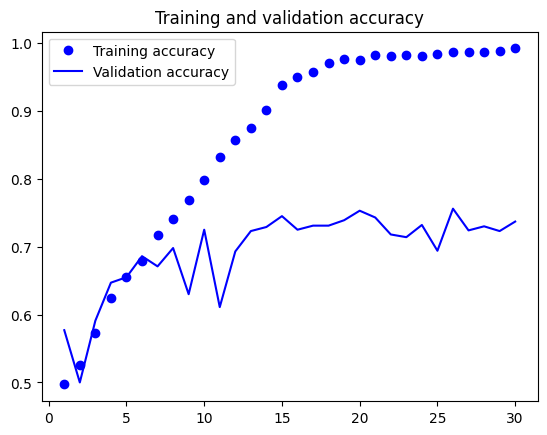

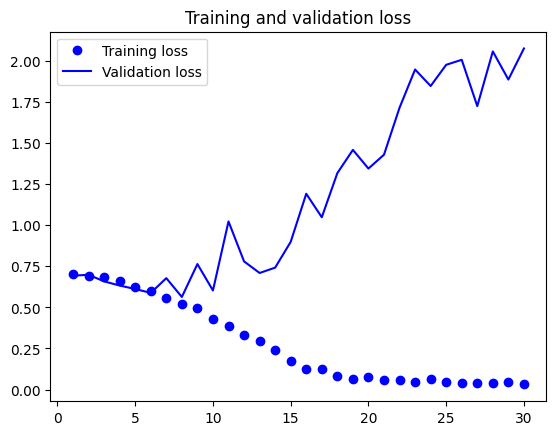

In [28]:
import matplotlib.pyplot as plt
plt.clf()
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [29]:
# EarlyStopping, ModelCheckpoint 콜백을 사용
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9942 - loss: 0.0286 - val_accuracy: 0.7460 - val_loss: 1.9609
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9831 - loss: 0.0631 - val_accuracy: 0.7340 - val_loss: 2.0703
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.7540 - val_loss: 1.9207
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9949 - loss: 0.0238 - val_accuracy: 0.7270 - val_loss: 2.2469
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9918 - loss: 0.0208 - val_accuracy: 0.7320 - val_loss: 2.0092
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.7620 - val_loss: 2.1653
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9914 - loss: 0.0328 - val_accuracy: 0.7330 - val_loss: 2.3540
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9932 - loss: 0.0433 - val_accuracy: 0.7620 - 

**테스트 세트에서 모델 평가하기**

In [30]:
!ls

cats_vs_dogs_small	    dogs-vs-cats.zip  kaggle.json  test
convnet_from_scratch.keras  drive	      sample_data  train


In [31]:
test_model = tf.keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.7327 - loss: 2.0234
테스트 정확도: 0.736


### 데이터 증식 사용하기

**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [32]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**랜덤하게 증식된 훈련 이미지 출력하기**

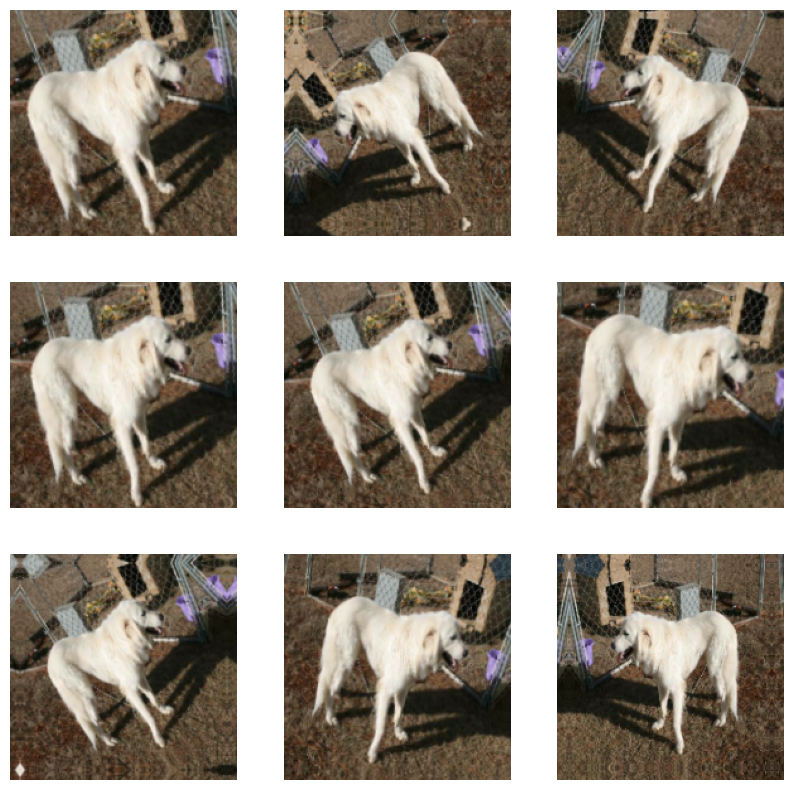

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): # 학습 데이터셋에서 하나의 배치를 가져오기
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        # "uint8"은 0부터 255까지의 값을 가질 수 있는 8비트 정수 타입을 의미하며, 이는 이미지 데이터를 표현하는 데 일반적으로 사용되는 데이터 타입.
        # astype("uint8")을 호출함으로써, 이미지 데이터가 해당 범위 내에 있도록 보장
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**이미지 증식과 드롭아웃을 포함한 컨브넷 만들기**
- epoch 마다 입력 데이터를 무작위로 변형하여 모델이 다양한 데이터를 학습하도록 도와주지만, 실제 데이터의 수는 증식 전과 동일하게 유지

In [34]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**컨브넷 훈련하기**

In [35]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.5026 - loss: 0.7036 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5177 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5390 - loss: 0.6925 - val_accuracy: 0.6310 - val_loss: 0.6707
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5915 - loss: 0.6765 - val_accuracy: 0.6120 - val_loss: 0.6515
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.6323 - loss: 0.6497 - val_accuracy: 0.5910 - val_loss: 0.7373
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6529 - loss: 0.6286 - val_accuracy: 0.6520 - val_loss: 0.6217
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6569 - loss: 0.6031 - val_accuracy: 0.6740 - val_loss: 0.5970
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.6924 - loss: 0.6166 - val_accuracy:

**테스트 세트에서 모델 훈련하기**

In [36]:
test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8293 - loss: 0.4577
테스트 정확도: 0.834


## 사전 훈련된 모델 활용하기

### 사전 훈련된 모델을 사용한 특성 추출

ImageNet 데이터셋

- ImageNet은 컴퓨터 비전 분야에서 매우 유명한 대규모 데이터셋입니다.
- 이 데이터셋은 1,000개의 클래스로 구성되어 있으며, 각 클래스에는 다양한 객체가 포함되어 있습니다. 예를 들어, 동물, 식물, 사물 등의 카테고리가 있습니다.
- 1,400만 개 이상의 이미지로 이루어져 있으며, 각 이미지에는 하나 이상의 객체에 대한 레이블이 붙어 있습니다.
- VGG16 모델은 **ILSVRC (ImageNet Large Scale Visual Recognition Challenge)**에서 사용된 1000개의 클래스에 대한 데이터를 사용해 훈련되었습니다. 이 챌린지는 이미지 분류, 객체 탐지 등의 다양한 비전 작업을 위한 벤치마크입니다.

**VGG16 합성곱 기반 층 만들기**

include_top=False의 default 값은 True

- include_top=True: VGG16 모델의 마지막에 있는 완전 연결 분류기 층(3개의 Dense 층과 마지막 Softmax 층)이 포함됩니다. 이는 주로 ImageNet 데이터셋과 동일한 1,000개의 클래스를 분류할 때 사용됩니다.
- include_top=False: VGG16 모델의 상단 분류기 부분을 제외하고, 합성곱층 기반만을 사용합니다. 이 옵션은 특징 추출(feature extraction) 작업에 유용하며, 마지막 층을 사용자의 문제에 맞게 재구성하거나 새로운 분류기를 추가할 수 있습니다.

In [45]:
import tensorflow as tf
from tensorflow.keras import layers
vgg16 = tf.keras.applications.vgg16.VGG16(
    weights="imagenet", # 모델에 ImageNet 데이터베이스에서 훈련된 가중치를 사용하겠다는 의미

    input_shape=(224, 224, 3))

vgg16.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers
conv_base = tf.keras.applications.vgg16.VGG16(
    weights="imagenet", # 모델에 ImageNet 데이터베이스에서 훈련된 가중치를 사용하겠다는 의미
    include_top=False, # ImageNet의 클래스 1000개에 대응되는 밀집 연결 분류기의 포함 여부
    input_shape=(180, 180, 3))

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**VGG16 특성과 해당 레이블 추출하기**

In [40]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images) # VGG16 모델에 맞춰 이미지를 전처리하는 과정
        features = conv_base.predict(preprocessed_images) # 전처리된 이미지를 입력받아 그에 대한 특징을 추출. 출력은 클래스 예측이 아닌 이미지의 특징 맵
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels) # 각 배치마다 추출된 특징과 레이블을 하나의 배열로 결합

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [41]:
train_features.shape

(2000, 5, 5, 512)

**밀집 연결 분류기 정의하고 훈련하기**

In [42]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8639 - loss: 29.3504 - val_accuracy: 0.9590 - val_loss: 5.7107
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 2.9999 - val_accuracy: 0.9700 - val_loss: 5.1710
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9880 - loss: 1.1080 - val_accuracy: 0.9750 - val_loss: 3.0480
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9921 - loss: 1.0879 - val_accuracy: 0.9660 - val_loss: 6.8611
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9892 - loss: 1.0234 - val_accuracy: 0.9750 - val_loss: 3.7248
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9920 - loss: 0.6748 - val_accuracy: 0.9770 - val_loss: 5.2133
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9973 - loss: 0.0367 - val_accuracy: 0.9730 - val_loss: 4.6386
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9940 - loss: 0.9397 - val_accuracy: 0.9600 - val_lo

In [46]:
!ls

cats_vs_dogs_small			      dogs-vs-cats.zip		kaggle.json  train
convnet_from_scratch.keras		      drive			sample_data
convnet_from_scratch_with_augmentation.keras  feature_extraction.keras	test


**결과를 그래프로 나타내기**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [48]:
test_model = tf.keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9714 - loss: 4.2766
테스트 정확도: 0.969


**전이 학습(Transfer Learning)**은 **이미 훈련된 모델**의 가중치를 새로운 문제에 적용하여 **재학습**하는 방법입니다. 이 방법은 특히 **큰 데이터셋**과 **복잡한 모델**이 필요한 딥러닝에서 매우 유용합니다. 전이 학습의 핵심 개념은 **한 도메인에서 학습한 지식을 다른 도메인**에 전이하는 것입니다.

### 전이 학습의 주요 아이디어
일반적으로 전이 학습은 다음과 같은 흐름을 따릅니다:

1. **사전 훈련된 모델 사용**:
   - 전이 학습에서 사전 훈련된 모델은 보통 **ImageNet** 같은 대규모 데이터셋에서 학습된 모델을 의미합니다.
   - 예를 들어, **VGG16**, **ResNet**, **Inception**과 같은 딥러닝 모델들은 수백만 개의 이미지를 사용해 사물 분류에 대한 특징을 학습한 상태입니다.

2. **특징 추출**:
   - 사전 훈련된 모델의 **초기 계층(저수준 특징 추출기)**은 **경계선, 질감, 색상**과 같은 일반적인 특징을 학습합니다.
   - 이 부분을 유지하면서, 특정 문제에 맞게 **모델의 상단 층**(보통 **분류기 층**)을 재구성하여 새로운 데이터셋에 맞는 분류를 학습시킬 수 있습니다.

3. **미세 조정(Fine-tuning)**:
   - 전이 학습에서 일반적으로 모델의 상단 일부만을 새 데이터셋에 맞게 재학습(fine-tuning)하거나, 사전 훈련된 가중치를 **고정(freeze)**하고 최상단 분류층만 학습시키는 방식이 사용됩니다.
   - 일부 경우에는 사전 훈련된 모델 전체에 대해 **미세 조정(fine-tuning)**을 수행하여 모델이 새로운 데이터셋에 맞게 더욱 잘 적응할 수 있도록 합니다.

### 전이 학습의 주요 단계

1. **사전 훈련된 모델 로드**:
   - ImageNet과 같은 대규모 데이터셋으로 학습된 모델을 로드합니다.
   - 모델의 구조와 가중치를 가져옵니다. 이때, `include_top=False`로 설정하여 모델의 마지막 분류층을 제외하고, 특징 추출에만 사용되는 합성곱 계층들을 사용할 수 있습니다.

2. **모델 동결(Freeze)**:
   - 학습된 가중치를 **고정(freeze)**하여 초기 계층의 가중치가 업데이트되지 않도록 설정합니다. 이는 모델이 기존 학습된 정보를 유지하면서 새로운 데이터셋에 적응하도록 하기 위함입니다.

3. **새 분류기 추가**:
   - 사전 훈련된 모델의 마지막 계층 위에 **새로운 분류기**(Dense Layer나 Softmax Layer 등)를 추가하여, 새로운 문제에 맞는 레이블로 모델이 학습할 수 있도록 합니다.
   - 예를 들어, 고양이와 개를 분류하는 문제라면 두 개의 출력 뉴런을 가진 분류층을 추가할 수 있습니다.

4. **새 데이터로 학습**:
   - 새로운 데이터셋을 사용해 모델을 **재학습**합니다. 이때, 일부 계층은 고정된 채로 유지하고, 새로운 분류기 층만 학습시키거나 전체 모델을 미세 조정할 수 있습니다.

### 전이 학습의 장점

1. **적은 데이터로도 학습 가능**:
   - 새로운 문제에 대해 학습할 때, 사전 훈련된 모델이 기존에 학습한 정보가 이미 포함되어 있으므로 **작은 데이터셋**으로도 좋은 성능을 얻을 수 있습니다. 이는 특히 대규모 데이터셋을 확보하기 어려운 경우에 유리합니다.

2. **시간과 자원 절약**:
   - 모델을 처음부터 학습시키지 않고 사전 훈련된 모델을 사용하므로 **훈련 시간과 자원**을 절약할 수 있습니다.

3. **성능 향상**:
   - 사전 훈련된 모델이 큰 데이터셋에서 학습한 **일반적인 패턴**을 활용할 수 있어, 더 빠르게 **좋은 성능**을 얻을 수 있습니다.

### 전이 학습의 예시

#### 1. **이미지 분류**
   - **ImageNet**에서 사전 훈련된 모델(VGG, ResNet 등)을 가져와, 다른 데이터셋(예: 고양이와 개를 구분하는 데이터셋)에서 학습을 수행할 수 있습니다.
   
#### 2. **객체 탐지(Object Detection)**
   - 전이 학습은 **YOLO**나 **Faster R-CNN** 같은 객체 탐지 모델에서도 사용됩니다. 사전 훈련된 모델을 기반으로 특정 도메인의 객체를 탐지하는 데 활용됩니다.

#### 3. **자연어 처리(NLP)**
   - NLP 분야에서는 **BERT**, **GPT**와 같은 사전 훈련된 모델이 다양한 언어 이해 및 생성 작업에 활용됩니다. 새로운 텍스트 데이터에 맞게 미세 조정하여 번역, 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.

전이 학습은 **사전 훈련된 모델을 기반으로 새로운 문제를 해결**하는 방법으로, 특히 **소량의 데이터**로도 **효율적으로 학습**할 수 있는 방법입니다. 사전 훈련된 모델이 일반적인 패턴을 학습한 상태에서, 새로운 도메인에 맞게 상위층을 재학습하거나 전체 모델을 미세 조정하는 방식으로 사용됩니다. 전이 학습은 **이미지 분류**, **객체 탐지**, **자연어 처리** 등 다양한 딥러닝 분야에서 매우 널리 사용되고 있습니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model():
    # 1. VGG16 모델 불러오기 (사전 훈련된 모델)
    conv_base = tf.keras.applications.VGG16(
        weights='imagenet',        # ImageNet 가중치 사용
        include_top=False,         # 분류기(fully connected layer) 제외
        input_shape=(180, 180, 3)  # 입력 이미지 크기
    )

    # 2. VGG16의 가중치를 고정 (학습되지 않도록 설정)
    conv_base.trainable = False

    # 3. VGG16과 커스텀 분류기 연결 (함수형 API 사용)
    inputs = tf.keras.Input(shape=(180, 180, 3))  # 입력 텐서
    x = conv_base(inputs)  # VGG16 모델에 입력
    x = layers.Flatten()(x)  # 3D 특징 맵을 1D로 변환
    x = layers.Dense(256, activation='relu')(x)  # 커스텀 분류기: Fully Connected Layer
    x = layers.Dropout(0.5)(x)  # Dropout 레이어
    outputs = layers.Dense(1, activation='sigmoid')(x)  # 출력: 이진 분류

    # 4. 전체 모델 정의
    model = models.Model(inputs=inputs, outputs=outputs)

    # 5. 모델 컴파일
    model.compile(
        loss='binary_crossentropy',  # 이진 분류를 위한 손실 함수
        optimizer='rmsprop',         # 옵티마이저
        metrics=['accuracy']         # 평가 지표: 정확도
    )

    return model

# 모델 생성
model = build_model()

# 6. 학습
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="fine_tuned_model.keras",  # 최적 모델 저장 경로
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,  # 학습 데이터셋
    epochs=20,
    validation_data=validation_dataset,  # 검증 데이터셋
    callbacks=callbacks
)


In [52]:
!ls

cats_vs_dogs_small			      drive			sample_data
convnet_from_scratch.keras		      feature_extraction.keras	test
convnet_from_scratch_with_augmentation.keras  fine_tuned_model.keras	train
dogs-vs-cats.zip			      kaggle.json


In [55]:
# 원본 이미지 데이터로 테스트
test_model = tf.keras.models.load_model("fine_tuned_model.keras")

test_loss, test_acc = test_model.evaluate(test_dataset, verbose=1)
print(f"테스트 정확도: {test_acc:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9576 - loss: 0.4719
테스트 정확도: 0.960
